In [2]:
import pandas as pd

In [3]:
CSV_PATH = 'C:\\tmp\\cycle_alu.csv'

df = pd.read_csv(CSV_PATH, sep=",", parse_dates=True, header=None, encoding = 'unicode_escape')  # index_col=0, # RamCheck/
print(df.count())

0    176
1    176
2    176
3    176
4    176
dtype: int64


In [4]:
# sen = 'Vikt (enligt tillverkaren) 12.0 kg'

# sentense = sen.split('kg')
# words = sentense[0].strip().split(' ')
# words[-1]


In [5]:
def get_weights(sen):
    sentense = sen.split('kg')
    words = sentense[0].strip().split(' ')
    return words[-1]
    

df['weight'] = df[3].map(get_weights)
df['weight'] = df['weight'].map(lambda x: 0 if x == 'False' else x)
df['weight'] = df['weight'].astype(float)

In [6]:
df.head()

,0,1,2,3,4,weight
0,2019-05-26 19:00:29,0,4 390 kr 3 779 kr,['Vikt (enligt tillverkaren) 13.8 kg'],Kross Lea 2.0 27.5 svart/röd/lila,13.8
1,2019-05-26 19:00:50,1,5 490 kr 4 649 kr,['Vikt (enligt tillverkaren) 13.2 kg'],Kross Lea 4.0 27.5 rosa/svart,13.2
2,2019-05-26 19:01:16,2,7 690 kr 6 729 kr,['Vikt (enligt tillverkaren) 13.7 kg'],Kross Level 4.0 27.5 svart/röd/vit,13.7
3,2019-05-26 19:01:40,3,4 390 kr 3 469 kr,['Vikt (enligt tillverkaren) 13.7 kg'],Kross Lea 1.0 svart/röd,13.7
4,2019-05-26 19:02:09,4,9 990 kr 8 991 kr,['Vikt (enligt tillverkaren) ca 14 kg'],Crescent Modig M20 29 matt svart,14.0


In [7]:
df[2].head()

0     4 390 kr 3 779 kr
1     5 490 kr 4 649 kr
2     7 690 kr 6 729 kr
3     4 390 kr 3 469 kr
4     9 990 kr 8 991 kr
Name: 2, dtype: object

In [8]:
sen = '4 990 kr 4 491 kr'
# sen = '2 990 kr'

def process_price(sen):
    words = sen.strip().split('kr')
    return float(words[-2].replace(' ', ''))

process_price(sen)

4491.0

In [9]:
df['price']=df[2].map(process_price)

In [10]:
df.dtypes

0          object
1           int64
2          object
3          object
4          object
weight    float64
price     float64
dtype: object

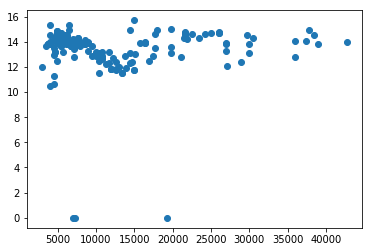

<Figure size 720x360 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['price'], df['weight']) 
# df.plot(x="price", y=["weight"])
plt.figure(figsize=(10,5))
plt.show()

In [14]:
df.loc[( df['price']<5000) & (df['weight']<12), :].sort_values(['weight', 'price'], ascending=[1, 0])

,0,1,2,3,4,weight,price
81,2019-05-26 19:34:28,81,3 990 kr,['Vikt (enligt tillverkaren) 10.5 kg'],Rock Machine Blizz 24 matt grå/gul/svart,10.50,3990.0
168,2019-05-26 20:10:33,168,4 590 kr,['Vikt (enligt tillverkaren) 10.65 kg'],Merida Matts J24 Race silver/grön,10.65,4590.0
94,2019-05-26 19:39:35,94,4 590 kr,['Vikt (enligt tillverkaren) 11.3 kg'],Merida Matts J24 Race vit/teal,11.30,4590.0
